<a href="https://colab.research.google.com/github/AlexGCas/web_scraping/blob/main/web_scraping_neurologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib
from bs4 import BeautifulSoup
import nltk
import PIL
import matplotlib.pyplot as plt
import re
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


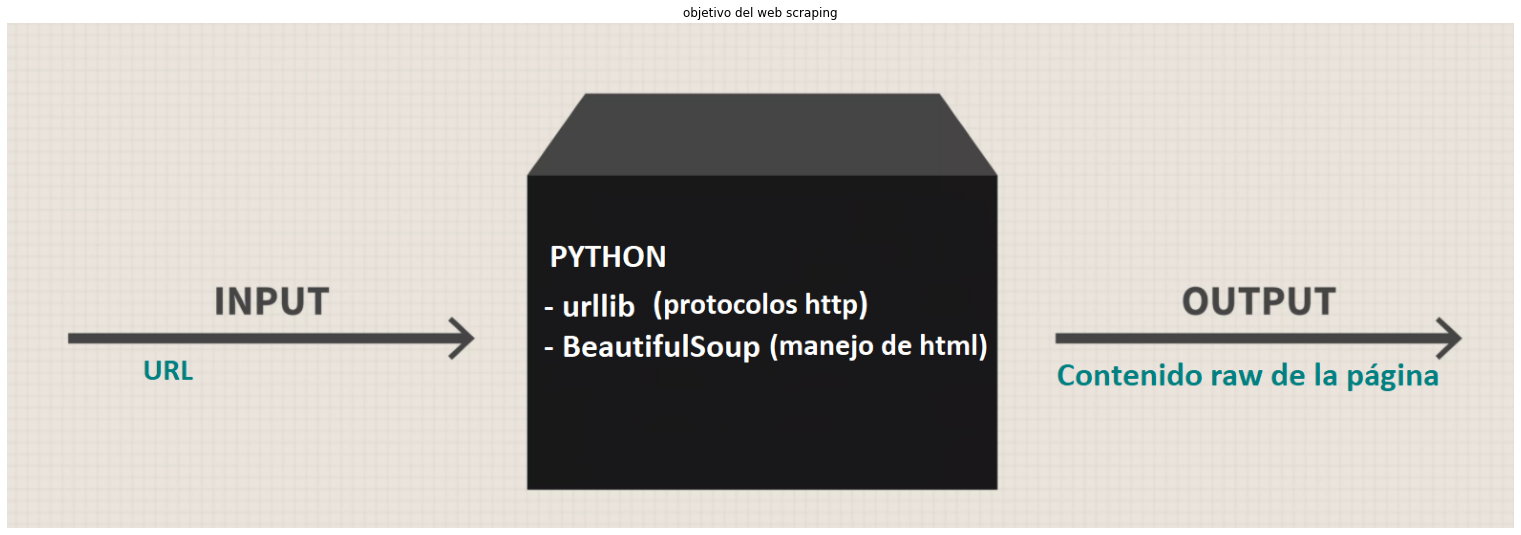

In [ ]:
url_imagen_objetivo = "/content/gdrive/MyDrive/imagenes/webscraping/objetivo.PNG"
imagen_objetivo = PIL.Image.open(url_imagen_objetivo)
titulo = "objetivo del web scraping"
plt.figure(figsize = (27, 13))
plt.imshow(imagen_objetivo)
plt.axis("off")
plt.title(titulo)
imagen_objetivo.close()

In [ ]:
url_imagenes = ["/content/gdrive/MyDrive/imagenes/webscraping/client-server-2x.png", 
"/content/gdrive/MyDrive/imagenes/webscraping/HTTP_Request_Headers2.png",
"/content/gdrive/MyDrive/imagenes/webscraping/An-HTTP-response-message.png"]
titulos = ["cliente-servidor", "http request", "http response"]
imagenes = [PIL.Image.open(url_imagen) for  url_imagen in url_imagenes]

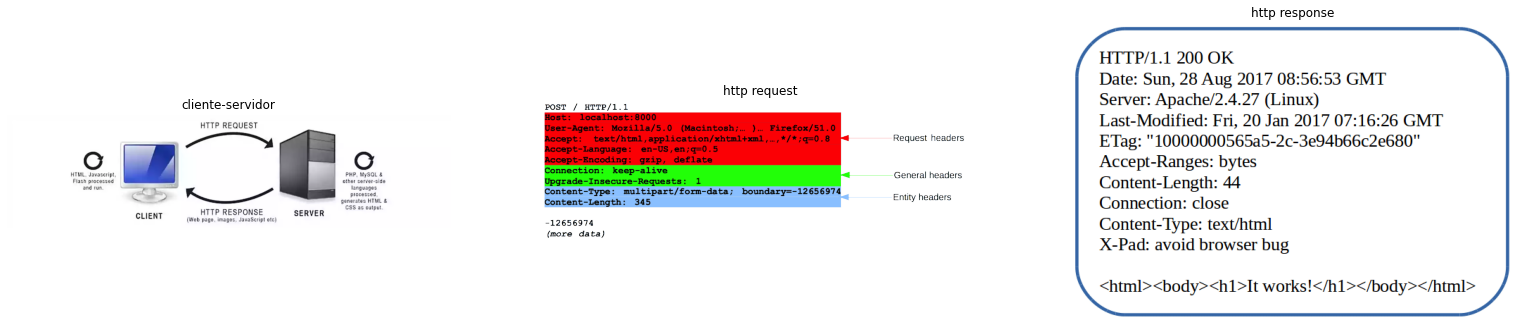

In [ ]:
plt.figure(figsize = (27, 10))
for i in range(len(imagenes)):
  plt.subplot(1, 3, i + 1)
  plt.imshow(imagenes[i])
  plt.axis("off")
  plt.title(titulos[i])
  imagenes[i].close()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Primero se realiza la extracción de un solo artículo a la vez para entender la estructura de la página, aquí se van a extraer artículos de:

1.   neurologia.com (revista electrónica de artículos cientificos de neurología)
2.   towardsdatascience.com (página con artículos de machine learning e inteligencia artificial)
3.   scielo (revista electrónica de artículos científicos electrónica)




# neurologia.com

Desgargar el documento html de la página

In [ ]:
def extraccion_soup(url, headers = {"User-Agent": "cualquier cosa"}):
  req = urllib.request.Request(url, headers = headers)
  res = urllib.request.urlopen(req) #aquí está el sitio web
  html_raw = res.read()
  soup = BeautifulSoup(html_raw)
  res.close()
  return soup

In [ ]:
def extraccion_contenido_neurologia(html):
  contenidos = html.find_all("span", {"class" : "resumen"})
  titulo = html.main.div.h1.text
  resumen_raw = contenidos[0].text.lower()
  
  try:
    contenido_referencias = contenidos[1].text.lower()
    contenido_raw = re.findall("([\w\W]+)bibliografía", contenido_referencias)[0]
    
    referencias_raw = re.findall("\.[\s]+bibliografía([\w\W]+)", contenido_referencias)[0]
  except:
    contenido_raw = resumen_raw
    referencias_raw = ""
  return titulo, resumen_raw, contenido_raw, referencias_raw

In [ ]:
def extraccion_links_neurologia(url):
  html = extraccion_soup(url)
  widget = [onclick.get("onclick") for onclick in html.find_all("div", {"id" : "w_articulo"})]
  links_articulos = [re.findall("http.+[0-9]", onclick)[0] for onclick in widget]
  return links_articulos

In [ ]:
url_guillain = "https://www.neurologia.com/articulo/2020487"
html_guillain = extraccion_soup(url_guillain)

In [ ]:
titulo_guillan, resumen_guillan, contenido_guillan, referencias_guillan = extraccion_contenido_neurologia(html_guillain)

In [ ]:
url_pronostico = "https://www.neurologia.com/articulo/2020236"
html_pronostico= extraccion_soup(url_pronostico)

In [ ]:
titulo_pronostico, resumen_pronostico, contenido_pronostico, referencias_pronostico = extraccion_contenido_neurologia(html_pronostico)

In [ ]:
url_prueba = "https://www.neurologia.com/articulo/99536"
html_prueba = extraccion_soup(url_prueba)
titulo_prueba , resumen_prueba , contenido_prueba , referencias_prueba = extraccion_contenido_neurologia(html_prueba )

In [ ]:
# titulo_, resumen_, contenido_, referencias_ = extraccion_contenido_neurologia(html_)

In [ ]:
url = "https://www.neurologia.com/categoria/10a/e48/neurodegeneracion"
links_articulos2 = extraccion_links_neurologia(url)

In [ ]:
links_articulos2

['https://www.neurologia.com/articulo/2020160',
 'https://www.neurologia.com/articulo/2019341',
 'https://www.neurologia.com/articulo/2019420',
 'https://www.neurologia.com/articulo/2019010',
 'https://www.neurologia.com/articulo/2019036',
 'https://www.neurologia.com/articulo/2018504',
 'https://www.neurologia.com/articulo/2018398',
 'https://www.neurologia.com/articulo/2018266',
 'https://www.neurologia.com/articulo/2018223',
 'https://www.neurologia.com/articulo/2018228',
 'https://www.neurologia.com/articulo/2017519',
 'https://www.neurologia.com/articulo/2017181',
 'https://www.neurologia.com/articulo/2017235',
 'https://www.neurologia.com/articulo/2017170',
 'https://www.neurologia.com/articulo/2017031',
 'https://www.neurologia.com/articulo/2016508',
 'https://www.neurologia.com/articulo/2016204',
 'https://www.neurologia.com/articulo/2016003',
 'https://www.neurologia.com/articulo/2015164',
 'https://www.neurologia.com/articulo/2015107']

In [ ]:
del db

In [ ]:
columnas = ["enlace", "titulo", "resumen", "contenido", "referencias"]
db = pd.DataFrame(columns = columnas)

In [ ]:
for i in range(len(links_articulos)):
  link = links_articulos[i]
  db = agregar_a_db(db, link)

In [ ]:
db

,enlace,titulo,resumen,contenido,referencias
1,https://www.neurologia.com/articulo/2020160,El bilingüismo como factor de protección de la...,introducción. la enfermedad de alzheimer (ea) ...,"introducción\nen la actualidad, se calcula que...","\r\n \n↵ 1. franco e, suárez a, bustamante e...."
2,https://www.neurologia.com/articulo/2019341,Potencial relacionado con eventos cognitivos P...,introducción. el valor del potencial relaciona...,"introducción\nel envejecimiento poblacional, a...",\r\n \n↵ 1. world health organization. the ep...
3,https://www.neurologia.com/articulo/2019420,Análisis exploratorio de la influencia de la r...,introducción. el objetivo principal de las ter...,introducción\nla demencia tipo alzheimer es un...,"\r\n \n↵ 1. robles a, del ser t, alom j, peña..."
4,https://www.neurologia.com/articulo/2019010,Reconocimiento de emociones básicas y sus prin...,introducción. en la demencia tipo alzheimer se...,introducción\nreconocimiento facial de emocion...,\r\n \n↵ 1. damasio ar. emotion in the perspe...
5,https://www.neurologia.com/articulo/2019036,Frecuente alteración de la vía amiloide en la ...,introducción. la demencia con cuerpos de lewy ...,introducción\nla demencia con cuerpos de lewy ...,"\r\n \n↵ 1. mckeith ig, dickson dw, lowe j, e..."
6,https://www.neurologia.com/articulo/2018504,Síntomas depresivos y sobrecarga en los famili...,introducción. el cuidado de los pacientes con ...,introducción\ncon el envejecimiento de la pobl...,\r\n \n↵ 1. garre-olmo j. epidemiología de la...
7,https://www.neurologia.com/articulo/2018398,Depresión tardía clínicamente relevante y ries...,objetivo. realizar un metaanálisis de estudios...,introducción\nla organización mundial de la sa...,\r\n \n↵ 1. world health organization. dement...
8,https://www.neurologia.com/articulo/2018266,Propiedades psicométricas del Profile of Mood ...,introducción. existe una creciente necesidad d...,introducción\nla demencia es un síndrome que i...,\r\n \n↵ 1. organización mundial de la salud....
9,https://www.neurologia.com/articulo/2018223,El eje microbiota-intestino-cerebro y sus gran...,introducción. se denomina microbiota al conjun...,introducción\nse denomina microbiota al conjun...,"\r\n \n↵ 1. lynch sv, pedersen o. the human i..."
10,https://www.neurologia.com/articulo/2018228,Deterioro cognitivo en el paciente muy anciano...,introducción. una considerable proporción de p...,introducción\nel deterioro cognitivo se ha con...,"\r\n \n↵ 1. morera-guitart j, pedro-cano mj. ..."


In [ ]:
link_utilidad = "https://www.neurologia.com/articulo/2020236"
db = agregar_a_db(db, link_utilidad)
db

,enlace,titulo,resumen,contenido,referencias
1,https://www.neurologia.com/articulo/2020160,El bilingüismo como factor de protección de la...,introducción. la enfermedad de alzheimer (ea) ...,"introducción\nen la actualidad, se calcula que...","\r\n \n↵ 1. franco e, suárez a, bustamante e...."
2,https://www.neurologia.com/articulo/2019341,Potencial relacionado con eventos cognitivos P...,introducción. el valor del potencial relaciona...,"introducción\nel envejecimiento poblacional, a...",\r\n \n↵ 1. world health organization. the ep...
3,https://www.neurologia.com/articulo/2019420,Análisis exploratorio de la influencia de la r...,introducción. el objetivo principal de las ter...,introducción\nla demencia tipo alzheimer es un...,"\r\n \n↵ 1. robles a, del ser t, alom j, peña..."
4,https://www.neurologia.com/articulo/2019010,Reconocimiento de emociones básicas y sus prin...,introducción. en la demencia tipo alzheimer se...,introducción\nreconocimiento facial de emocion...,\r\n \n↵ 1. damasio ar. emotion in the perspe...
5,https://www.neurologia.com/articulo/2019036,Frecuente alteración de la vía amiloide en la ...,introducción. la demencia con cuerpos de lewy ...,introducción\nla demencia con cuerpos de lewy ...,"\r\n \n↵ 1. mckeith ig, dickson dw, lowe j, e..."
6,https://www.neurologia.com/articulo/2018504,Síntomas depresivos y sobrecarga en los famili...,introducción. el cuidado de los pacientes con ...,introducción\ncon el envejecimiento de la pobl...,\r\n \n↵ 1. garre-olmo j. epidemiología de la...
7,https://www.neurologia.com/articulo/2018398,Depresión tardía clínicamente relevante y ries...,objetivo. realizar un metaanálisis de estudios...,introducción\nla organización mundial de la sa...,\r\n \n↵ 1. world health organization. dement...
8,https://www.neurologia.com/articulo/2018266,Propiedades psicométricas del Profile of Mood ...,introducción. existe una creciente necesidad d...,introducción\nla demencia es un síndrome que i...,\r\n \n↵ 1. organización mundial de la salud....
9,https://www.neurologia.com/articulo/2018223,El eje microbiota-intestino-cerebro y sus gran...,introducción. se denomina microbiota al conjun...,introducción\nse denomina microbiota al conjun...,"\r\n \n↵ 1. lynch sv, pedersen o. the human i..."
10,https://www.neurologia.com/articulo/2018228,Deterioro cognitivo en el paciente muy anciano...,introducción. una considerable proporción de p...,introducción\nel deterioro cognitivo se ha con...,"\r\n \n↵ 1. morera-guitart j, pedro-cano mj. ..."


In [ ]:
utilidad = extraccion_soup(link_utilidad)
titulo, resumen_raw, contenido_raw, referencias_raw = extraccion_contenido_neurologia(utilidad)

['\r\n\xa0\n↵\xa01.\xa0 mao l, jin h, wang m, hu y, chen s, he q, et al. neurologic manifestations of hospitalized patients with coronavirus disease 2019 in wuhan, china jama neurol 2020; 77: 1-9.\n↵\xa02.\xa0 helms j, kremer s, merdji h, clere-jehl r, schenck m, kummerlen c, et al. neurologic features in severe sars-cov-2 infection. n engl j med 2020; 382: 2268-70.\n↵\xa03.\xa0 romero-sánchez cm, díaz-maroto i, fernández-díaz e, sánchez-larsen a, layos-romero a, garcía-garcía j, et al. neurologic manifestations in hospitalized patients with covid-19: the albacovid registry. neurology 2020; 95: e1060-70.\n↵\xa04.\xa0 garcía-azorín d, abenza-abildúa m, erro-aguirre m, fernández-fernández s, garcía-moncó j, guijarro-castro c, et al. resultados del registro sen de manifestaciones neurológicas asociadas a la infección por covid-19. i congreso nacional covid-19. libro de abstracts. madrid: sen; 2020. p. 39-40.\n↵\xa05.\xa0 tsai st, lu mk, san s, tsai ch. the neurologic manifestations of cor

In [ ]:
links_articulos2 = extraccion_links_neurologia("https://www.neurologia.com/categoria/10a/e48/neurodegeneracion/2")
for i in range(len(links_articulos2)):
  link = links_articulos2[i]
  db = agregar_a_db(db, link)

In [ ]:
db

,enlace,titulo,resumen,contenido,referencias
1,https://www.neurologia.com/articulo/2020160,El bilingüismo como factor de protección de la...,introducción. la enfermedad de alzheimer (ea) ...,"introducción\nen la actualidad, se calcula que...","\r\n \n↵ 1. franco e, suárez a, bustamante e...."
2,https://www.neurologia.com/articulo/2019341,Potencial relacionado con eventos cognitivos P...,introducción. el valor del potencial relaciona...,"introducción\nel envejecimiento poblacional, a...",\r\n \n↵ 1. world health organization. the ep...
3,https://www.neurologia.com/articulo/2019420,Análisis exploratorio de la influencia de la r...,introducción. el objetivo principal de las ter...,introducción\nla demencia tipo alzheimer es un...,"\r\n \n↵ 1. robles a, del ser t, alom j, peña..."
4,https://www.neurologia.com/articulo/2019010,Reconocimiento de emociones básicas y sus prin...,introducción. en la demencia tipo alzheimer se...,introducción\nreconocimiento facial de emocion...,\r\n \n↵ 1. damasio ar. emotion in the perspe...
5,https://www.neurologia.com/articulo/2019036,Frecuente alteración de la vía amiloide en la ...,introducción. la demencia con cuerpos de lewy ...,introducción\nla demencia con cuerpos de lewy ...,"\r\n \n↵ 1. mckeith ig, dickson dw, lowe j, e..."
6,https://www.neurologia.com/articulo/2018504,Síntomas depresivos y sobrecarga en los famili...,introducción. el cuidado de los pacientes con ...,introducción\ncon el envejecimiento de la pobl...,\r\n \n↵ 1. garre-olmo j. epidemiología de la...
7,https://www.neurologia.com/articulo/2018398,Depresión tardía clínicamente relevante y ries...,objetivo. realizar un metaanálisis de estudios...,introducción\nla organización mundial de la sa...,\r\n \n↵ 1. world health organization. dement...
8,https://www.neurologia.com/articulo/2018266,Propiedades psicométricas del Profile of Mood ...,introducción. existe una creciente necesidad d...,introducción\nla demencia es un síndrome que i...,\r\n \n↵ 1. organización mundial de la salud....
9,https://www.neurologia.com/articulo/2018223,El eje microbiota-intestino-cerebro y sus gran...,introducción. se denomina microbiota al conjun...,introducción\nse denomina microbiota al conjun...,"\r\n \n↵ 1. lynch sv, pedersen o. the human i..."
10,https://www.neurologia.com/articulo/2018228,Deterioro cognitivo en el paciente muy anciano...,introducción. una considerable proporción de p...,introducción\nel deterioro cognitivo se ha con...,"\r\n \n↵ 1. morera-guitart j, pedro-cano mj. ..."
